# Load data

In [1]:
import pandas as pd
from siml_data import Featureset

In [2]:
feature_loader = Featureset()

In [3]:
df = feature_loader.get()

## Check for NaN values

In [4]:
df.isna().sum().sum()

0

## Remove all channels except Close price

In [5]:
[x for x in df.columns if 'btc' in x.lower()]

['btcusd_dOpen', 'btcusd_dHigh', 'btcusd_dLow', 'btcusd_dClose']

In [6]:
df = df.drop(columns=[c for c in df.columns if 'Close' not in c])

## Check correlation

<Axes: >

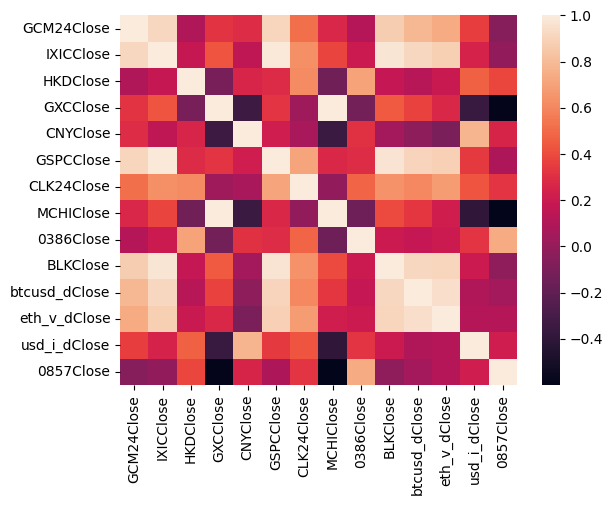

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())

In [8]:
df.corr()['btcusd_dClose'].abs().sort_values(ascending=False).head(10)

btcusd_dClose    1.000000
eth_v_dClose     0.945606
IXICClose        0.916503
BLKClose         0.912576
GSPCClose        0.902721
GCM24Close       0.786737
CLK24Close       0.605982
GXCClose         0.372193
MCHIClose        0.327378
0386Close        0.173504
Name: btcusd_dClose, dtype: float64

## Preprocess data

In [9]:
from siml_pipeline import Pipeline

In [10]:
p = Pipeline()
X_train, X_test, Y_train, Y_test = p.process(df, 'btcusd_dClose')

In [11]:
n_of_features = X_train.shape[-1]
X_test.shape, Y_train.shape, Y_test.shape

((407, 10, 13), (1240, 1), (407, 1))

# Train model

In [12]:
from siml_model import build_model

In [13]:
model = build_model(p.num_days, n_of_features)

2024-05-12 17:09:07.696666: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 17:09:07.697136: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 24)            3648      
_________________________________________________________________
dropout (Dropout)            (None, 10, 24)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 12)            1776      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 12)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 6)             456       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 6)             0         
_________________________________________________________________
flatten (Flatten)            (None, 60)                0

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [16]:
epochs = 18
batch = 128

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=epochs,
                    batch_size=batch)

2024-05-12 17:09:08.260431: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/18
10/10 [==============================] - 3s 77ms/step - loss: 1.0068 - mae: 0.7266 - val_loss: 1.8138 - val_mae: 1.1072
Epoch 2/18
10/10 [==============================] - 0s 31ms/step - loss: 0.9816 - mae: 0.7110 - val_loss: 1.8324 - val_mae: 1.1149
Epoch 3/18
10/10 [==============================] - 0s 32ms/step - loss: 0.9230 - mae: 0.6556 - val_loss: 1.9716 - val_mae: 1.1691
Epoch 4/18
10/10 [==============================] - 0s 31ms/step - loss: 0.8367 - mae: 0.5507 - val_loss: 2.3061 - val_mae: 1.2788
Epoch 5/18
10/10 [==============================] - 0s 35ms/step - loss: 0.6311 - mae: 0.4525 - val_loss: 1.6653 - val_mae: 1.0483
Epoch 6/18
10/10 [==============================] - 0s 33ms/step - loss: 0.3403 - mae: 0.3250 - val_loss: 0.8005 - val_mae: 0.7149
Epoch 7/18
10/10 [==============================] - 0s 34ms/step - loss: 0.3004 - mae: 0.3156 - val_loss: 0.9658 - val_mae: 0.7686
Epoch 8/18
10/10 [==============================] - 0s 34ms/step - loss: 0.2413 - m

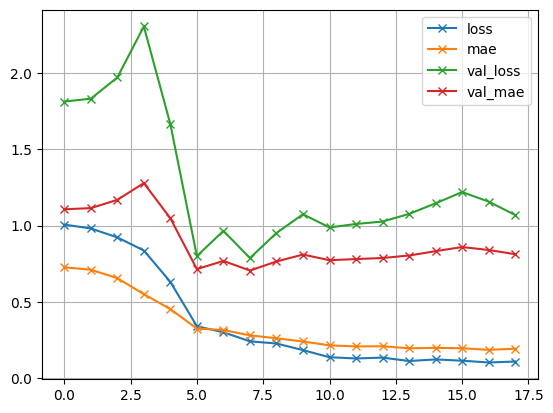

In [17]:
for k,v in history.history.items():
    plt.plot(v, 'x-', label=k)
plt.legend()
plt.grid()